In [1]:
from vista_ssm import vista, EMmlgssm, InitEMmlgssm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=600
import numpy as np

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
dataset = np.load("../data/population_dataset.npy").reshape(20, 100, 1, 1)
label = np.load("../data/population_label.npy")

tp=np.array([np.linspace(0,1,len(dataset[t])) for t in range(len(dataset))])

for nc in [2]:
    for dx in range(2,8):
        print((nc,dx))
        param_dic={'DIM_X': dx,
                   'DIM_Y': 1,
                   'NUM_DATA': 20,
                   'N_CLUSTER' : nc,
                   'NUM_CPU' : 30,
                   'FIX' : [],
                   'NUM_LGSSM' : 30,
                   'MAX_ITER' : 1000,
                   'EPSILON' : 0.1,
                   'BIC' : True}
        for i in range(10):
            result_state=vista.runVISTA('kmeans',param_dic,dataset,tp,labels=label)
            vista.savedic(result_state,'../results/panel/panel_kmeans_'+str(nc)+'_cluster_'+str(dx)+'_latent_'+str(i)+'.pickle')

In [5]:
vista.agg_perf('../results/panel/panel_kmeans_',[2],list(range(2,15)),10,criteria=[1],std=[True,True],label=label)

Information Criteria:

ABIC:
                     2
2   -1.25E+04 (272.77)
3   -1.23E+04 (376.51)
4   -1.24E+04 (100.67)
5   -1.22E+04 (180.85)
6   -1.20E+04 (174.26)
7   -1.18E+04 (178.33)
8   -1.16E+04 (141.54)
9   -1.12E+04 (106.13)
10  -1.09E+04 (132.41)
11  -1.04E+04 (386.27)
12  -1.01E+04 (136.89)
13  -9.57E+03 (160.49)
14  -9.12E+03 (194.03)

Cluster Similarity:
              2
2   0.84 (0.06)
3   0.78 (0.08)
4   0.82 (0.05)
5   0.81 (0.03)
6   0.79 (0.05)
7   0.80 (0.06)
8   0.80 (0.04)
9   0.78 (0.05)
10  0.79 (0.05)
11  0.80 (0.04)
12  0.82 (0.05)
13  0.80 (0.05)
14  0.79 (0.07)


confusion matrix
[[ 5  4]
 [ 0 11]]
Accuracy :  0.8
ROC AUC:  0.7777777777777778


              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.73      1.00      0.85        11

    accuracy                           0.80        20
   macro avg       0.87      0.78      0.78        20
weighted avg       0.85      0.80      0.79        20



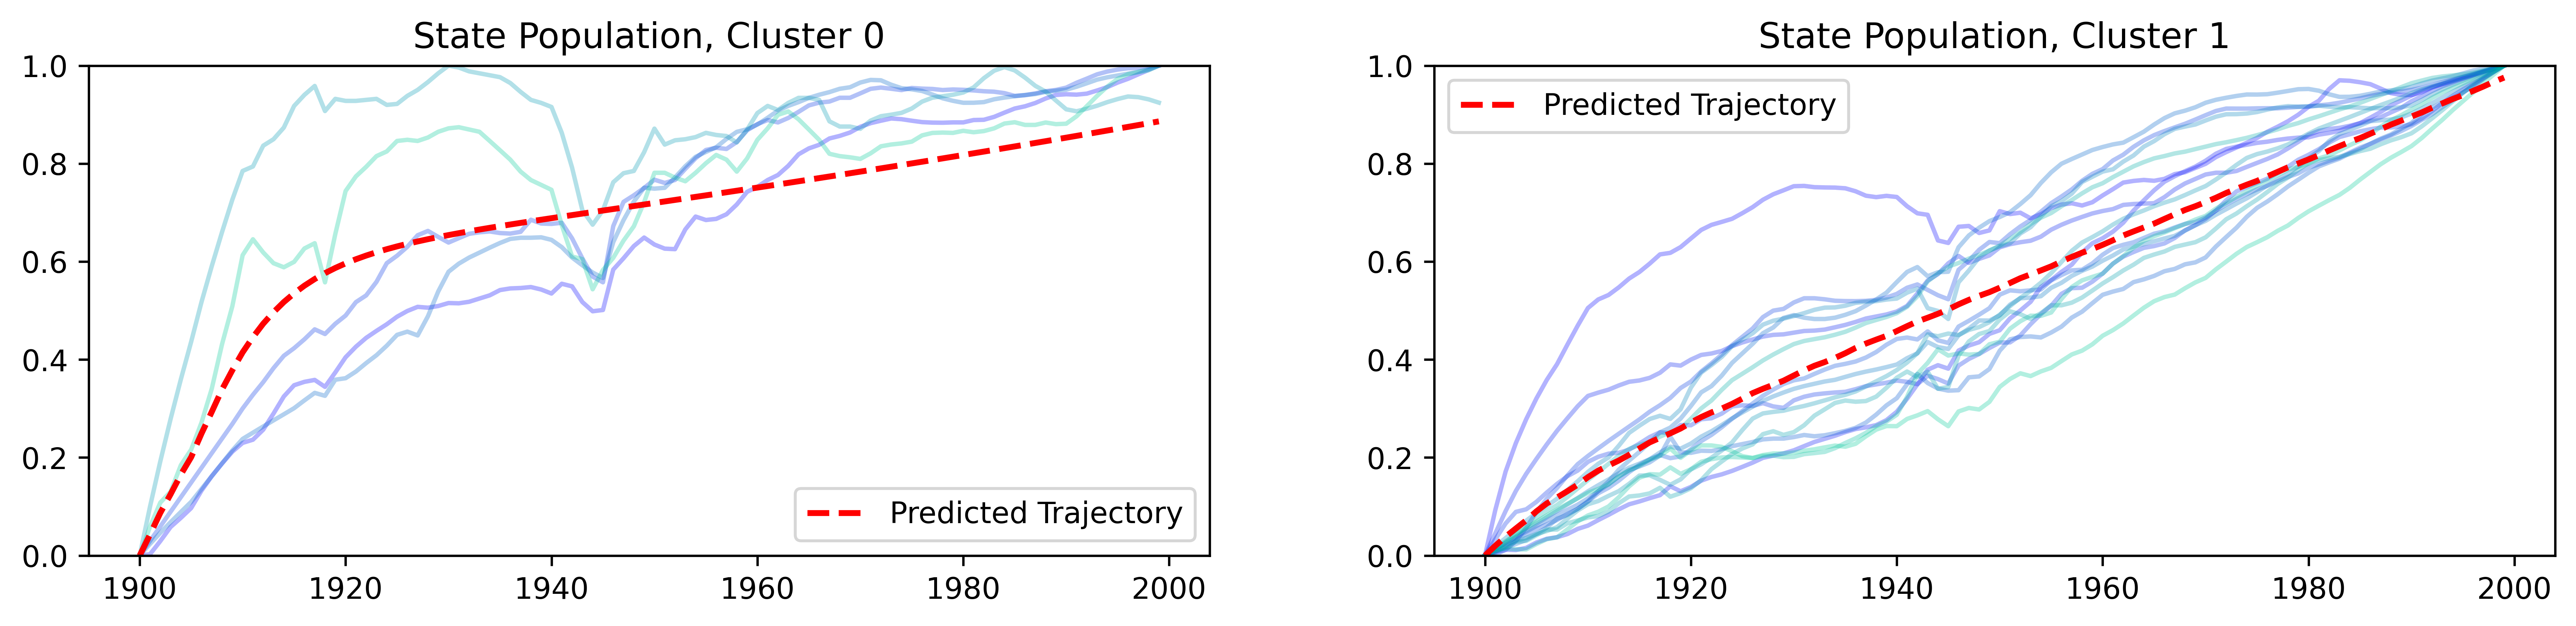

In [13]:
nc=2
result=vista.loaddic('../results/panel/panel_kmeans_2_cluster_12_latent_7.pickle')
vista.summarystats(label,result['label'],nc)
result_permuted=vista.best_perm(label,result['label'],nc,result['parameter'])
vista.predicted_trajectories(result_permuted['parameter'],dataset,result_permuted['label'],100,T_final=1,
                              num_sam=20,legend=False,xplot=[1900,1999],plotcolor=(plt.cm.winter,0,0.8,0.3),
                              features=['State Population'],row_labels=states,ylim=[0,1])

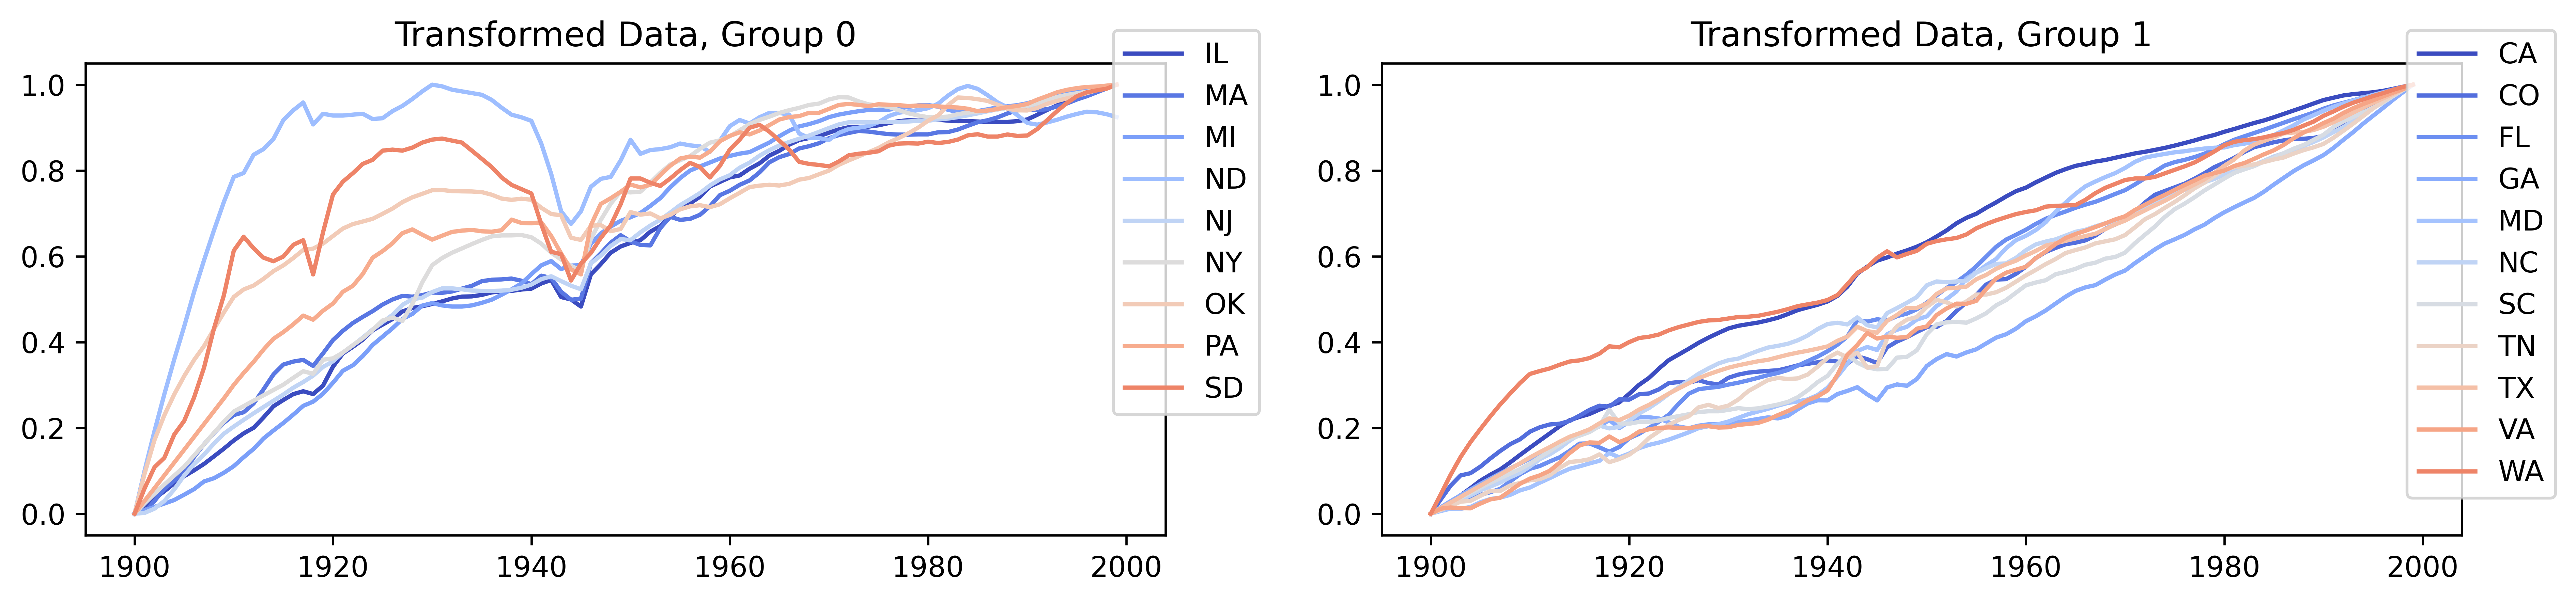

In [6]:
group1=['CA', 'CO', 'FL', 'GA', 'MD', 'NC', 'SC', 'TN', 'TX', 'VA', 'WA']
group2=['IL', 'MA', 'MI', 'NJ', 'NY', 'OK', 'PA', 'ND', 'SD']
states=(group1+group2)
states.sort()

fig = plt.figure(figsize=(15,3))
for l in range(2):
    ax=fig.add_subplot(1,2,l+1)
    for i in range(20):
        if label[i]==l:
            ax.plot(np.linspace(1900,1999,100),dataset.reshape(20,100)[i],label=states[i])
    for k,j in enumerate(ax.lines):
        colormap = plt.cm.coolwarm
        colors = [colormap(i) for i in np.linspace(0, 0.8, len(ax.lines))]
        j.set_color(colors[k])
    ax.legend(loc='best', bbox_to_anchor=(.6, .6, 0.5, 0.5))
#plt.title('Log-transformed & Min-Maxed State Populations Over Time \n For each state, 0= min log pop value, 1=max log pop value')
    ax.set_title(f'Transformed Data, Group {l}')
plt.show()